In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 
import os

**Membaca Gambar**

In [2]:
path_foto = os.path.join(os.getcwd(), 'image', 'bayu.jpg')

**Meload Gambar**

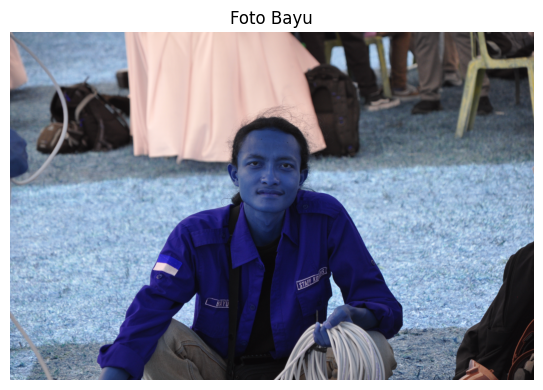

In [3]:
foto = cv2.imread(path_foto)

fig, ax = plt.subplots(1, 1, figsize=(7, 4))
ax.imshow(foto)
ax.set_title('Foto Bayu')
ax.axis('off')
plt.tight_layout()
plt.show()


**Mengonversi Gambar menjadi RGG**

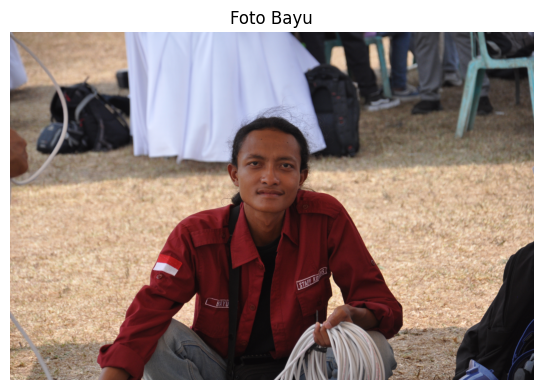

In [4]:
foto = cv2.imread(path_foto)
foto = cv2.cvtColor(foto, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(1, 1, figsize=(7, 4))
ax.imshow(foto)
ax.set_title('Foto Bayu')
ax.axis('off')
plt.tight_layout()
plt.show()

## Soal 1

### - Melakukan resize pada foto menjadi 1080 pada dimension terpanjangnya

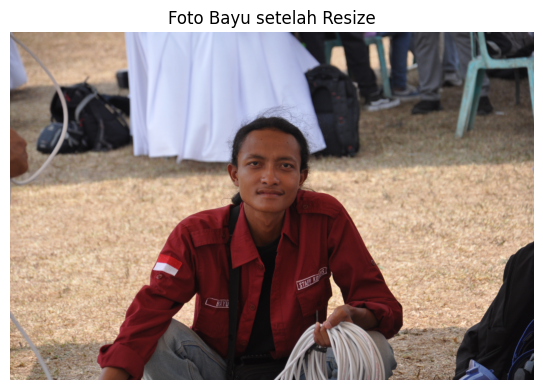

In [5]:
# Dapatkan dimensi asli
height, width = foto.shape[:2]

# Tentukan skala berdasarkan dimensi terpanjang
if width > height:
    scale = 1080 / width
else:
    scale = 1080 / height

# Hitung dimensi baru
new_width = int(width * scale)
new_height = int(height * scale)

# Resize gambar
resized_image = cv2.resize(foto, (new_width, new_height), interpolation=cv2.INTER_AREA)

fig, ax = plt.subplots(1, 1, figsize=(7, 4))
ax.imshow(resized_image)
ax.set_title('Foto Bayu setelah Resize')
ax.axis('off')
plt.tight_layout()
plt.show()

### - Menambahkan frame kuning di setiap sisi foto

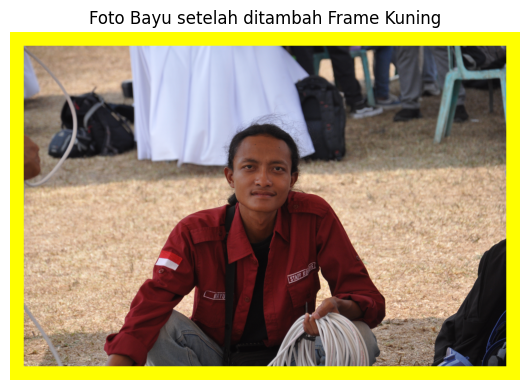

In [6]:
# Tentukan ketebalan frame
frame_thickness = 122

# Tambahkan frame dengan warna kuning (255, 255, 0) di setiap sisi gambar
framed_image = cv2.copyMakeBorder(
    foto,
    top=frame_thickness,
    bottom=frame_thickness,
    left=frame_thickness,
    right=frame_thickness,
    borderType=cv2.BORDER_CONSTANT,
    value=(255, 255, 0)  # Warna kuning dalam RGB
)

fig, ax = plt.subplots(1, 1, figsize=(7, 4))
ax.imshow(framed_image)
ax.set_title('Foto Bayu setelah ditambah Frame Kuning')
ax.axis('off')
plt.tight_layout()
plt.show()

### - Mengatur Intensitas warna pada channel merah dan menurunkan intensitas warna pada channel biru, serta menampilkan histogram

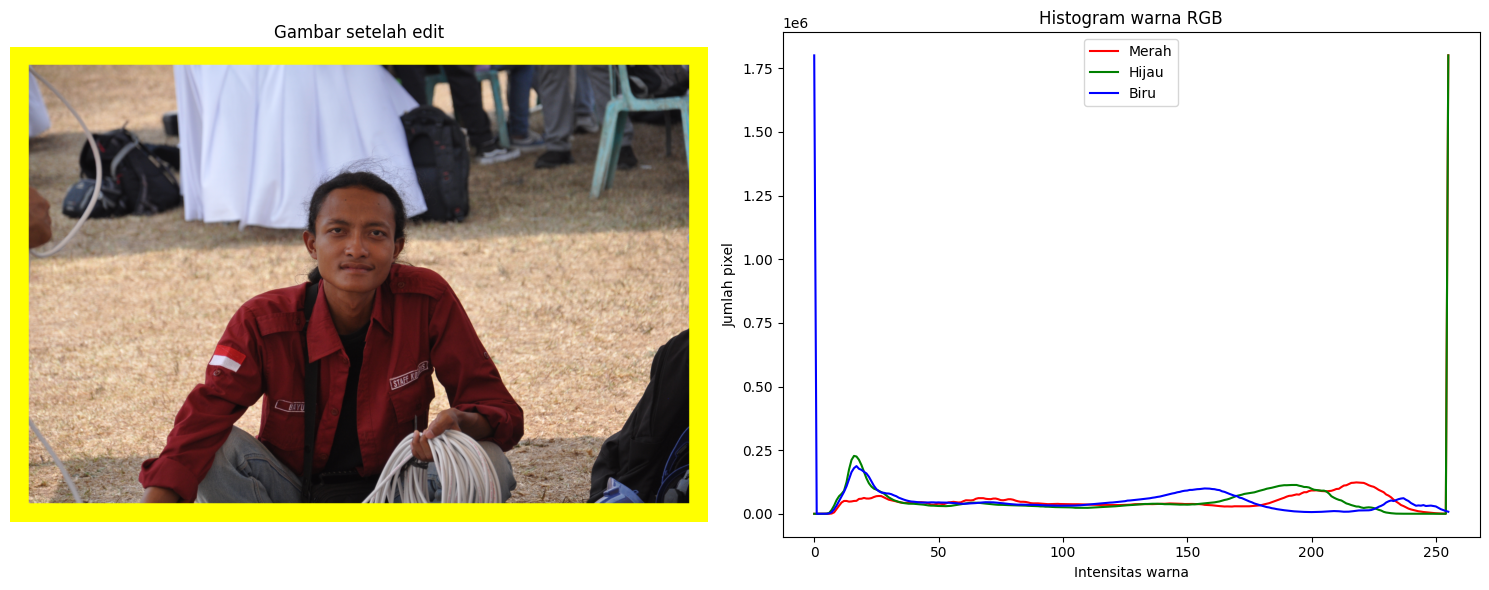

In [8]:
framed_image[(framed_image[:, :, 2] >= 50) & (framed_image[:, :, 2] <= 150)]
framed_image[:, :, 2] = np.clip(framed_image[:, :, 2], 0, 255)
# Turunkan intensitas warna pada channel biru di atas (200-250), dan turunkan se
framed_image[(framed_image[:, :, 0] >= 200) & (framed_image[:, :, 0] <= 25)]
framed_image[:, :, 0] = np.clip(framed_image[:, :, 0], 0, 255)


histo_foto_red_edit = cv2.calcHist([framed_image], [0], None, [256], [0, 256])
histo_foto_green_edit = cv2.calcHist([framed_image], [1], None, [256], [0, 256])
histo_foto_blue_edit = cv2.calcHist([framed_image], [2], None, [256], [0, 256])

ax, fig = plt.subplots(1, 2, figsize=(15, 6))
fig[0].imshow(framed_image)
fig[0].axis('off')
fig[0].set_title('Gambar setelah edit')
fig[1].plot(histo_foto_red_edit, color='red')
fig[1].plot(histo_foto_green_edit, color='green')
fig[1].plot(histo_foto_blue_edit, color='blue')
fig[1].set_title('Histogram warna RGB')
fig[1].set_xlabel('Intensitas warna')
fig[1].set_ylabel('Jumlah pixel')
fig[1].legend(['Merah', 'Hijau', 'Biru'])
plt.tight_layout()
plt.show()

### - Penjelasan Eksperimen

1. **Resize Foto**

- Saya melakukan resize foto dengan dimensi terpanjangnya menjadi 1080 pixel menggunakan cv2.resize. Hal ini memungkinkan kita untuk mempertahankan rasio aspek asli foto sehingga tidak terjadi distorsi

2. **Menambahkan Frame Kuning**

- Selanjutnya, saya menambahkan frame berwarna kuning dengan ketebalan frame 122 pixel menggunakan cv2.copyMakeBorder pada setiap sisi foto.

3. **Mengatur Intensitas Warna pada Channel Merah dan Biru**

- Di sini saya mengatur intensitas warna pada channel merah dan biru di bagian foto yang spesifik. Pada channel merah di bagian tengah (baris 50-15-) saya menaikkan intensitas warna merah sebesar 20 poin. Pada channel biru di bagian atas (baris 200-250) saya menurunkan instensitas warna biru sebesar 20 poin.

4. **Menampilkan Histogram dari Foto tersebut**

- Gambar yang telah saya edit sedemikian rupa, selanjutnya saya tampilkan histogram RGB dari foto tersebut.

## Soal 2

### - Convert foto dari RGB menjadi Grayscale

Text(0, 0.5, 'Jumlah pixel')

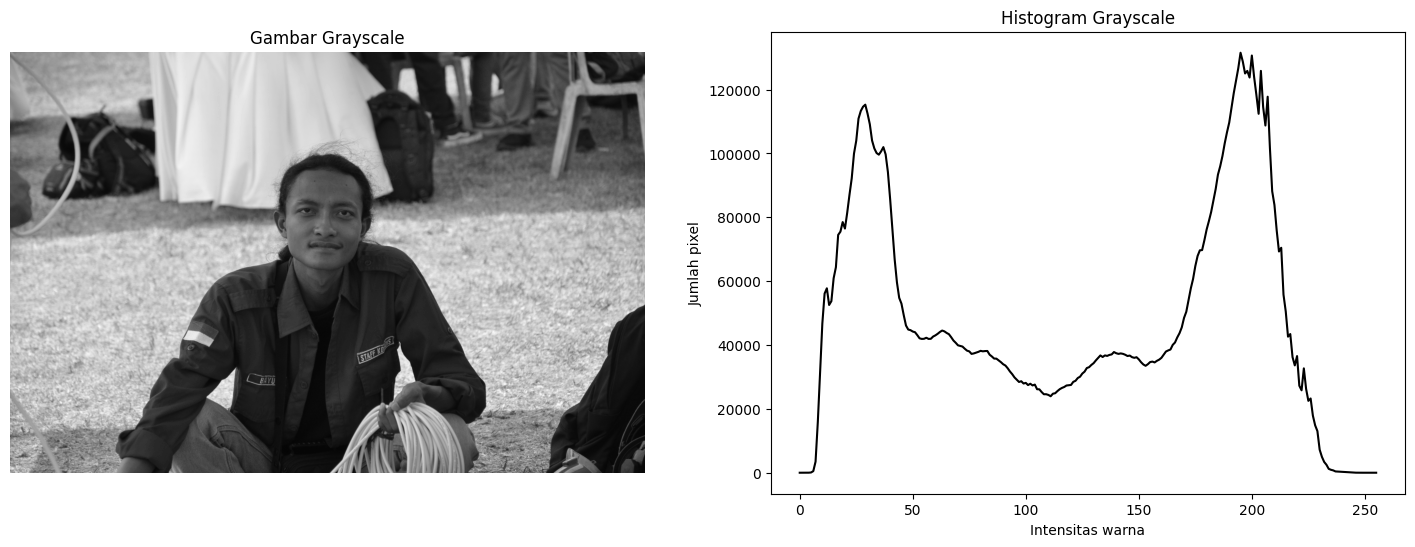

In [ ]:
foto = cv2.imread(path_foto)
foto_gray = cv2.cvtColor(foto, cv2.COLOR_BGR2GRAY)

fig, ax = plt.subplots(1, 2, figsize=(18, 6))
ax[0].imshow(foto_gray, cmap='gray')
ax[0].set_title('Foto Grayscale')
ax[0].axis('off')
hist_gray = cv2.calcHist([foto_gray], [0], None, [256], [0, 256])
ax[1].plot(hist_gray, color='black')
ax[1].set_title('Histogram Foto Grayscale')
ax[1].set_xlabel('Intensitas warna')
ax[1].set_ylabel('Jumlah pixel')

### - Normalisasi Foto

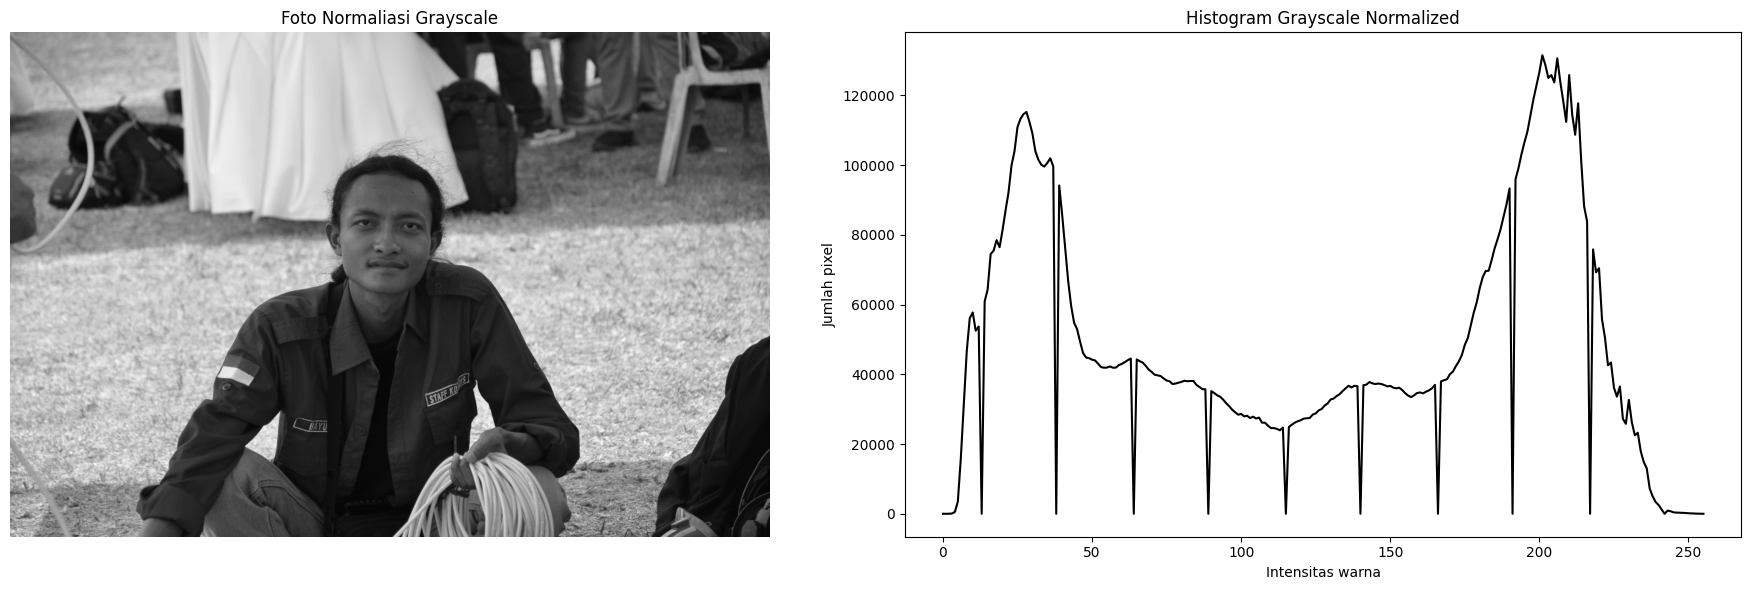

In [16]:
foto_gray_normalisasi = cv2.normalize(foto_gray, None, 0, 255, cv2.NORM_MINMAX)

fig, ax = plt.subplots(1, 2, figsize=(18, 6))
ax[0].imshow(foto_gray_normalisasi, cmap='gray')
ax[0].set_title('Foto Normaliasi Grayscale')
ax[0].axis('off')
hist_gray_normalisas = cv2.calcHist([foto_gray_normalisasi], [0], None, [256], [0, 256])
ax[1].plot(hist_gray_normalisas, color='black')
ax[1].set_title('Histogram Grayscale Normalized')
ax[1].set_xlabel('Intensitas warna')
ax[1].set_ylabel('Jumlah pixel')
plt.tight_layout()
plt.show()


### - Membuat Pixel-art dari Foto tersebut

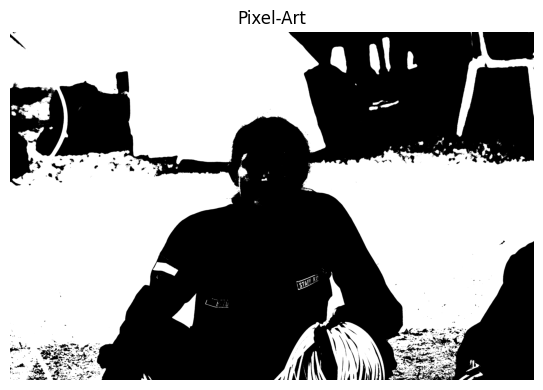

In [20]:
pixel_art = np.where(foto_gray_normalisasi < 128, 0, 255).astype(np.uint8)
# Plot gambar pixel-art
fig, ax = plt.subplots(1, 1, figsize=(7, 4))
ax.imshow(pixel_art, cmap='gray')
ax.set_title('Pixel-Art')
ax.axis('off')
plt.tight_layout()
plt.show()


---

## Referensi

- Pada soal nomor 1, saya mencari jawaban dalam melakukan resize foto, menambahkan frame kuning, dan mengatur intensitas warna pada chatGPT (https://chatgpt.com/c/6724e983-e6dc-800a-a71f-143b84f19bed)

- Pada soal nomor 2, saya melihat punya Bima Setiawan Sandi (121140162) untuk menjawa pertanyaan melalukan normalisasi dan membuat pixel art pada foto.

Punya bima:

![Jawaban Bima](punya_bima.png)